# Predicting Hotel Booking Cancellations


### Introduction
Booking cancellations are without a doubt the biggest headaches of any revenue manager or hotel manager nowadays. The simplicity of canceling the reservation and the fact that most of the time there is no fee involved makes it extremely easy for customers to cancel their reservations and create a missed opportunity for the hotels. If before 2020 booking cancellations was a top issue for hotels with percentage of cancelations going as high as 40% or 50% in some hotels, in 2021, one year after the pandemic that hit the hospitality industry so hard, having a tool to predict customers booking cancelations became vital for the success or even survival of these businesses.

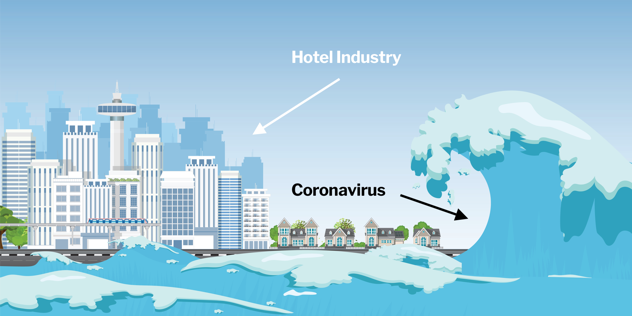

One of the immediate economic impacts that happened after COVID-19 was declared a world-wide pandemic was the full stop in everything that was related to tourism. Bars and restaurants, airlines and hotels were hit the hardest by this. So with limited customers willing to travel and to book a hotel room and plenty of availability, it became crucial for hotels to attract new customers, and even more important to identify those who might cancel their reservation and establish a business strategy to have them keep their reservation before they cancel. So for their survival in a pandemic and post-pandemic world, hotels must adapt and use all tools at hand to maximize profits.

These are the reasons I decided to choose data from hospitality industry to create my Capstone project. The data I found comes from 2 hotels from Portugal and it consists of bookings records from a two year period, 2015 to 2017. The records contain information about the customer such as what type of room he wants, how man parking spaces, what type of meals, and so on. Obviously, for security reasons, any information regarding actual customers, the hotels, agents or companies working with the two hotels was changed to protect that sensitive data.

The project comprises all steps of Data Science work divided as follows:

 - Data wangling
 - Exploratory Data Analysis
 - Pre-processing and training data development
 - Modeling
 - Documentation

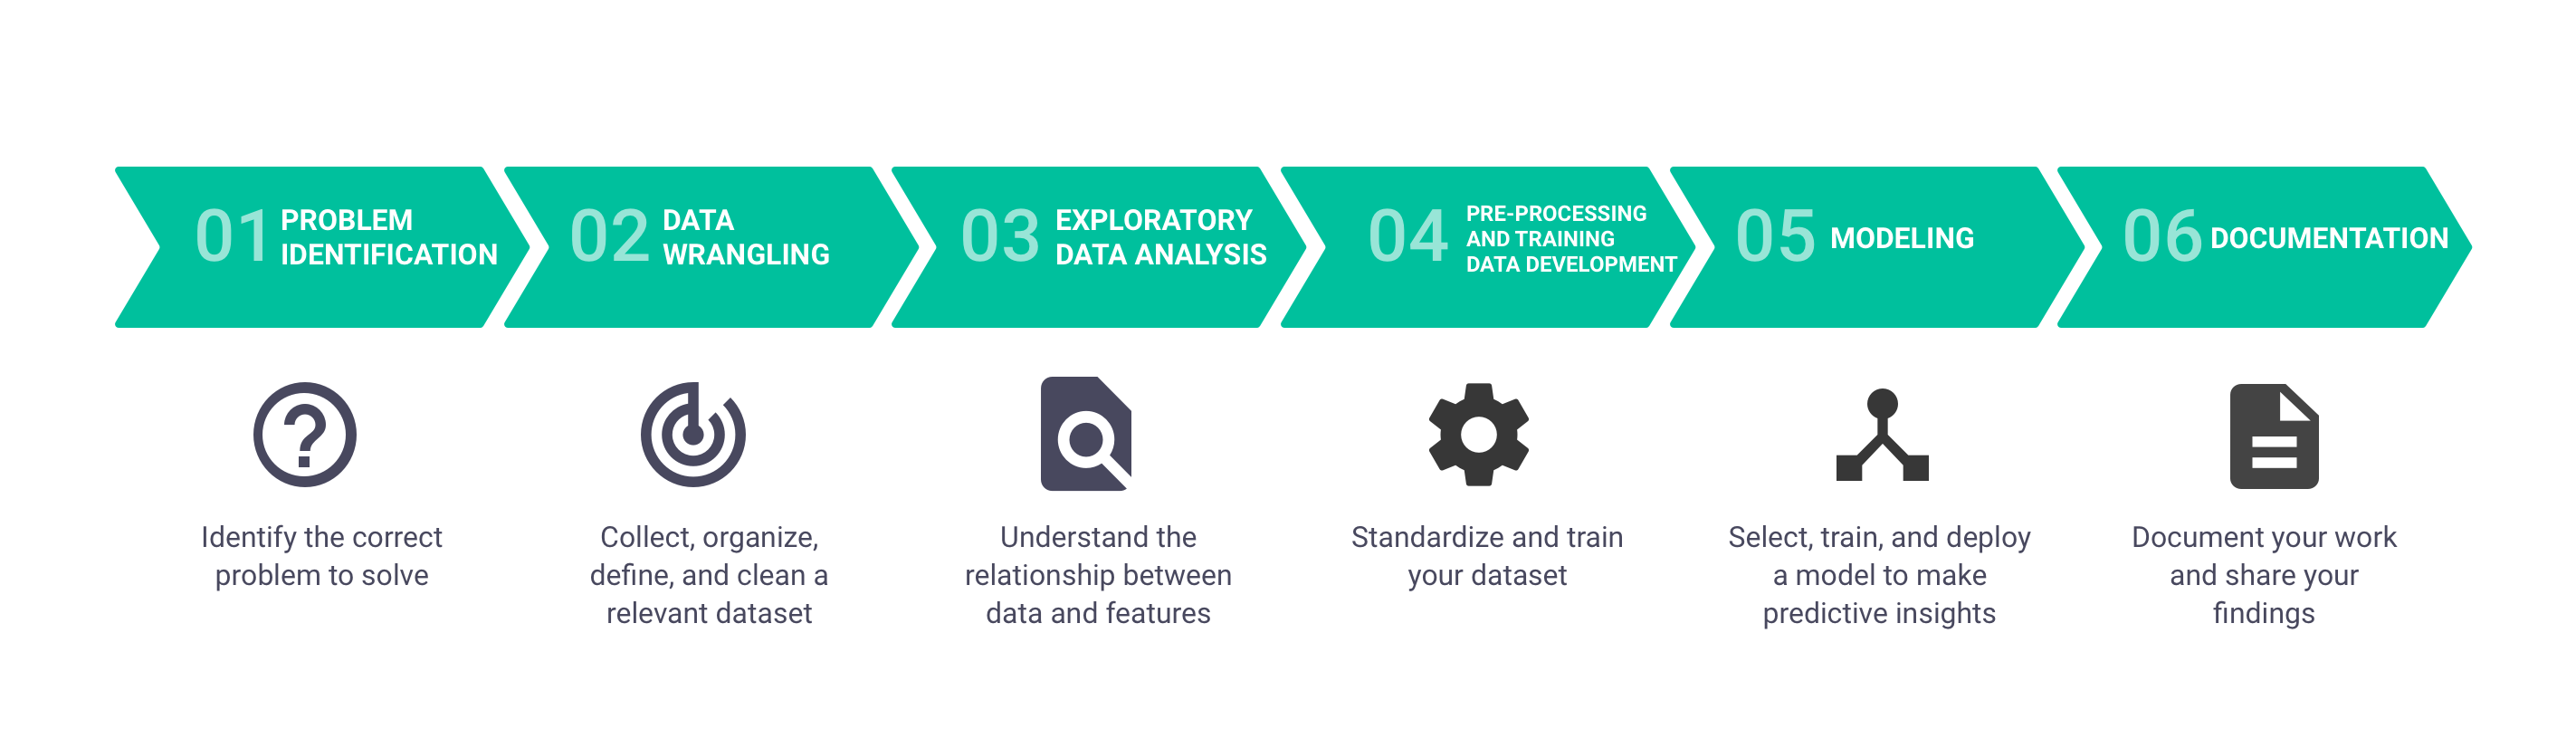

## Data Wrangling

### Importing libraries

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')


### Data Loading and Joining

In [2]:
#Loading the data from the 2 hotels
h1 = pd.read_csv('../data/raw/H1.csv')
h2 = pd.read_csv('../data/raw/H2.csv')

In [3]:
#Adding a new column, hotel_name, before merging the 2 given datasets
h1.insert(0, column = 'hotel_name', value="Resort Hotel")
h2.insert(0, column = 'hotel_name', value="City Hotel")
hotels = h1.append(h2)
hotels.head()

,hotel_name,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
print("Dataset size:", hotels.shape)

Dataset size: (119390, 32)


### Data Organization

We can see that the features names can be improved for a better visibility

In [5]:
#Using existing column names to create updated names
hotels.columns

Index(['hotel_name', 'IsCanceled', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [6]:
#Updating the columns names
new_columns = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year','arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
hotels.columns = new_columns
hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
#Let's explore the data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal             

In [8]:
#Changing the type of categorical data to 'category'. For future exploration of is_canceled feature I will keet this non-categorical
categ_columns = ['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                     'is_repeated_guest', 'reserved_room_type','assigned_room_type', 'deposit_type', 'agent','company',
                     'customer_type','reservation_status']
hotels['reservation_status_date'] = pd.to_datetime(hotels['reservation_status_date'])
for i in new_columns:
    if i in  categ_columns:
        hotels[i] = hotels[i].astype('object')
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#New data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64 

## Data Definition

We will start by using the **describe** method on categorical and then on non-categorical features. 
After that, we will explore the features descriptions and range of values as presented in the [Science Direct](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005) article.

In [10]:
#Non-categorical features
hotels.describe(exclude = 'object', datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390,0.370416,0,0,0,1,1,0.482918
lead_time,119390,104.011,0,18,69,160,737,106.863
arrival_date_year,119390,2016.16,2015,2016,2016,2017,2017,0.707476
arrival_date_week_number,119390,27.1652,1,16,28,38,53,13.6051
arrival_date_day_of_month,119390,15.7982,1,8,16,23,31,8.78083
stays_in_weekend_nights,119390,0.927599,0,0,1,2,19,0.998613
stays_in_week_nights,119390,2.5003,0,1,2,3,50,1.90829
adults,119390,1.8564,0,2,2,2,55,0.579261
children,119386,0.10389,0,0,0,0,10,0.398561
babies,119390,0.00794874,0,0,0,0,10,0.0974362


In [11]:
#Categorical features
hotels.describe(include = 'object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641


### Features description:

 0. **hotel** - The 2 hotels from Portugal: "Resort Hotel" at the resort region of Algarve and "City Hotel" at the city of Lisbon.
 1. **is_canceled** - Value indicating if the booking was canceled (1) or not (0)
 2. **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS(Property Management System) and the arrival date
 3. **arrival_date_year** - Year of arrival date
 4. **arrival_date_month** - Month of arrival date with 12 categories: “January” to “December”
 5. **arrival_date_week_number** - Week number of the arrival date
 6. **arrival_date_day_of_month** - Day of arrival date
 7. **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
 8. **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
 9. **adults** - Number of adults
 10. **children** - Number of children
 11. **babies** - Number of babies
 12. **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
        - Undefined/SC – no meal package;
        - BB – Bed & Breakfast;
        - HB – Half board (breakfast and one other meal – usually dinner);
        - FB – Full board (breakfast, lunch and dinner)
 13. **country** - Country of origin. Categories are represented in the [ISO 3155–3:2013](https://www.iso.org/standard/63547.html) format.
 14. **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
 15. **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
 16. **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)
 17. **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking
 18. **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking
 19. **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons
 20. **assigned_room_type** - Code for the type of room assigned to the booking.
 21. **booking_changes** - Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
 22. **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
     - No Deposit – no deposit was made;
     - Non Refund – a deposit was made in the value of the total stay cost;
     - Refundable – a deposit was made with a value under the total cost of stay.
 23. **agent** - ID of the travel agency that made the booking
 24. **company** - ID of the company/entity that made the booking or responsible for paying the booking
 25. **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer
 26. **customer_type** - Type of booking, assuming one of four categories:
    - Contract - when the booking has an allotment or other type of contract associated to it;
    - Group – when the booking is associated to a group;
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
 27. **adr** - The average daily rate (ADR) is a metric widely used in the hospitality industry to indicate the average revenue earned for an occupied room on a given day
 28. **required_car_parking_spaces** - Number of car parking spaces required by the customer
 29. **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)
 30. **reservation_status** - Reservation last status, assuming one of three categories:
        - Canceled – booking was canceled by the customer;
        - Check-Out – customer has checked in but already departed;
        - No-Show – customer did not check-in and did inform the hotel of the reason why
 31. **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### Exploring some categorical features against Target Feature

Before moving to data cleaning, let's explore the uniques values in our categorical features and how they are distributed against our target feature, **is_canceled**.

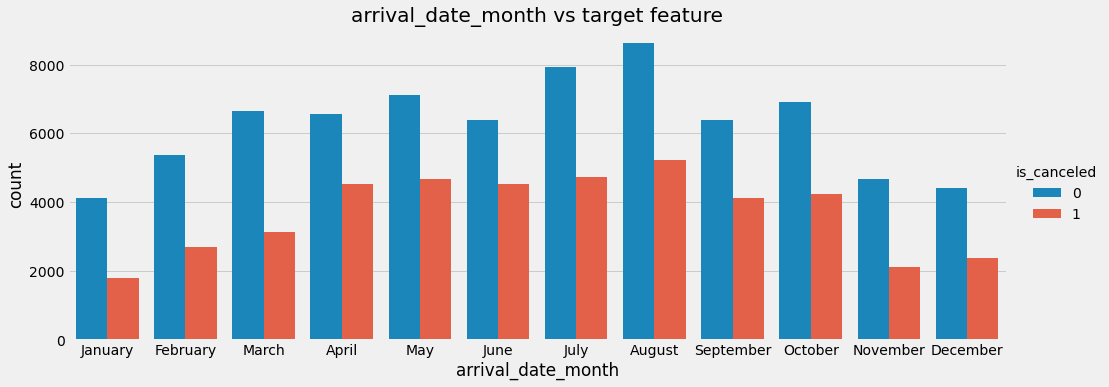

In [12]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
sns.catplot(x="arrival_date_month", hue = 'is_canceled', kind="count", data=hotels, order = months, height=5, aspect=14/5)
plt.title('arrival_date_month vs target feature')
plt.show()

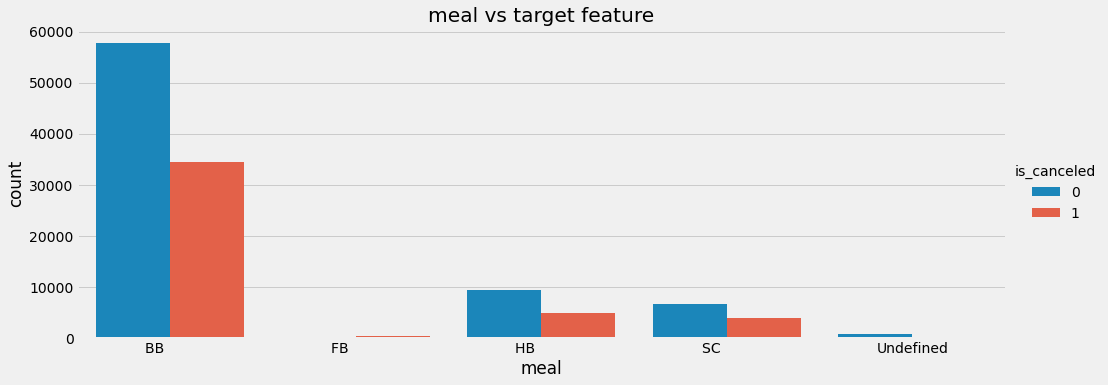

In [13]:
sns.catplot(x="meal", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('meal vs target feature')
plt.show()

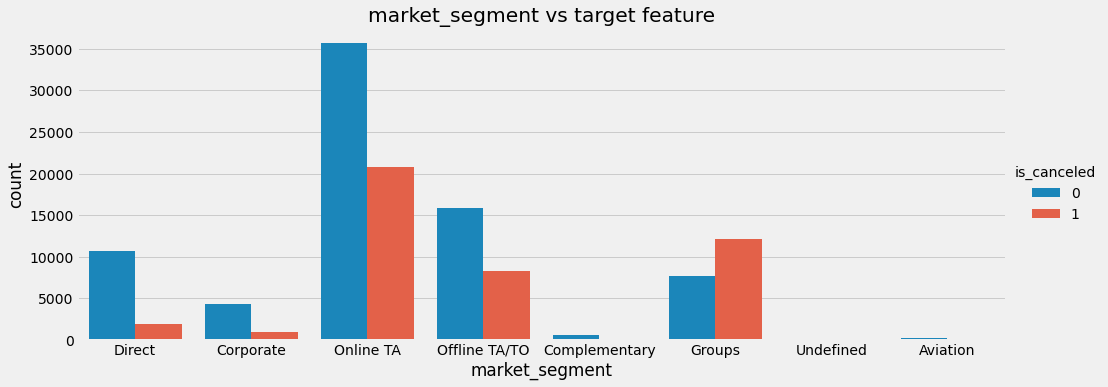

In [14]:
sns.catplot(x="market_segment", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('market_segment vs target feature')
plt.show()

We can see that Groups are more prone to canceling their reservations.

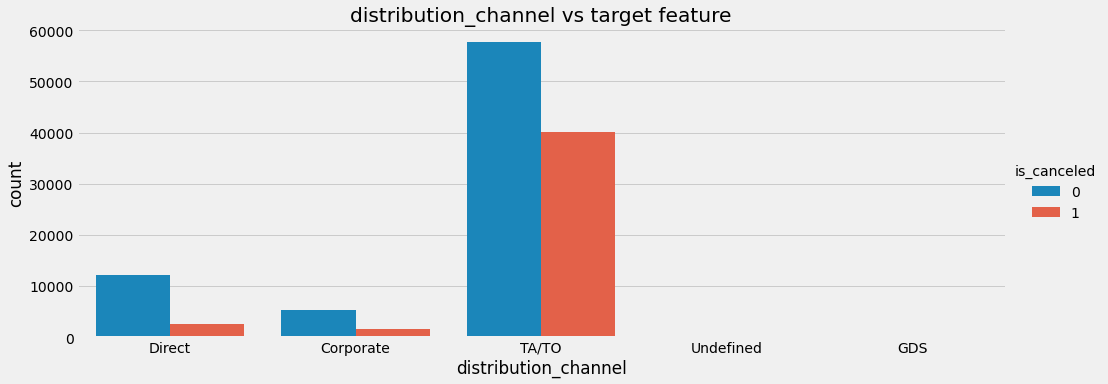

In [15]:
sns.catplot(x="distribution_channel", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('distribution_channel vs target feature')
plt.show()

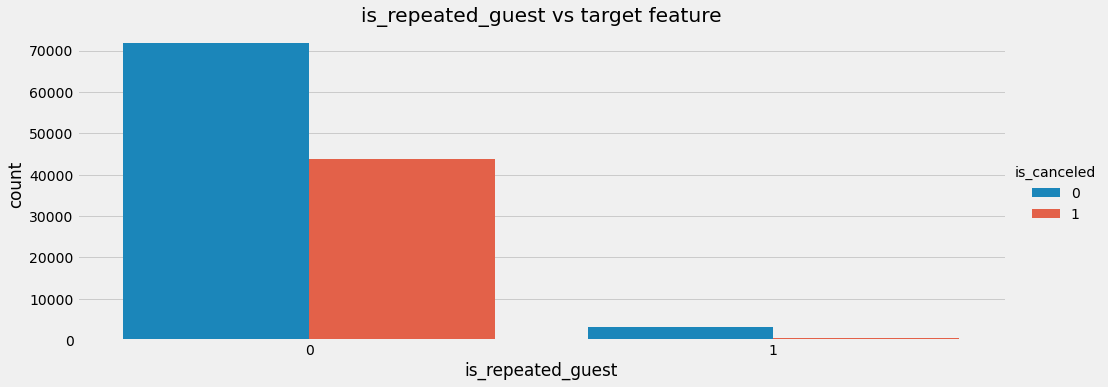

In [16]:
sns.catplot(x="is_repeated_guest", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('is_repeated_guest vs target feature')
plt.show()

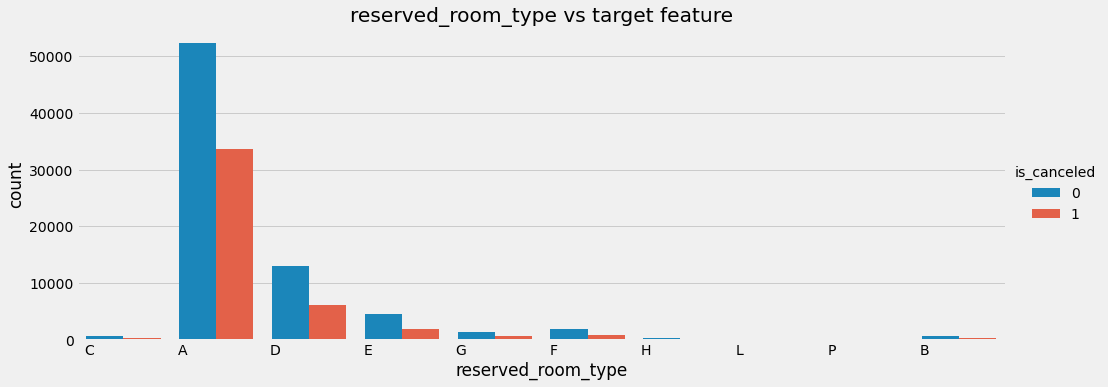

In [17]:
sns.catplot(x="reserved_room_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('reserved_room_type vs target feature')
plt.show()

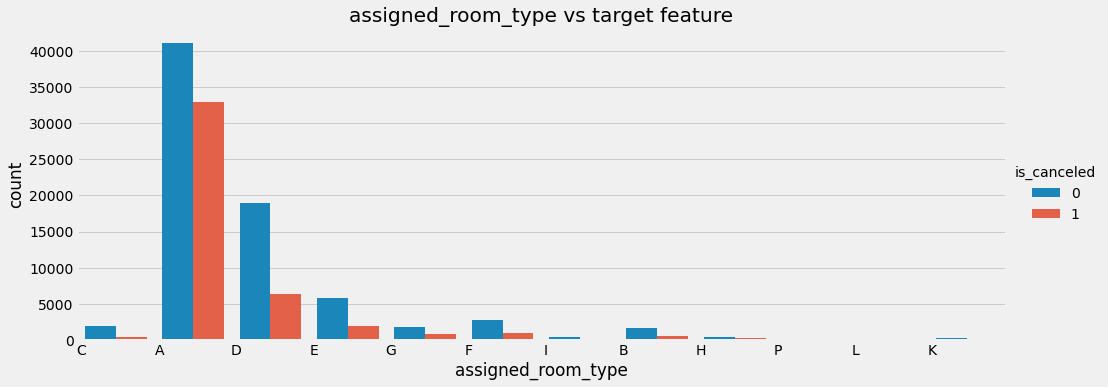

In [18]:
sns.catplot(x="assigned_room_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('assigned_room_type vs target feature')
plt.show()

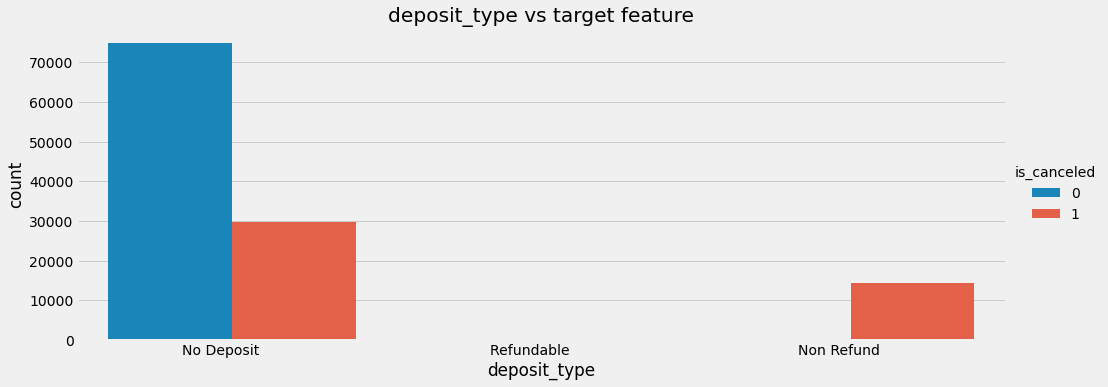

In [19]:
sns.catplot(x="deposit_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('deposit_type vs target feature')
plt.show()

It seems that almost all of those who made a non-refundable deposit eventually canceled their appointment.

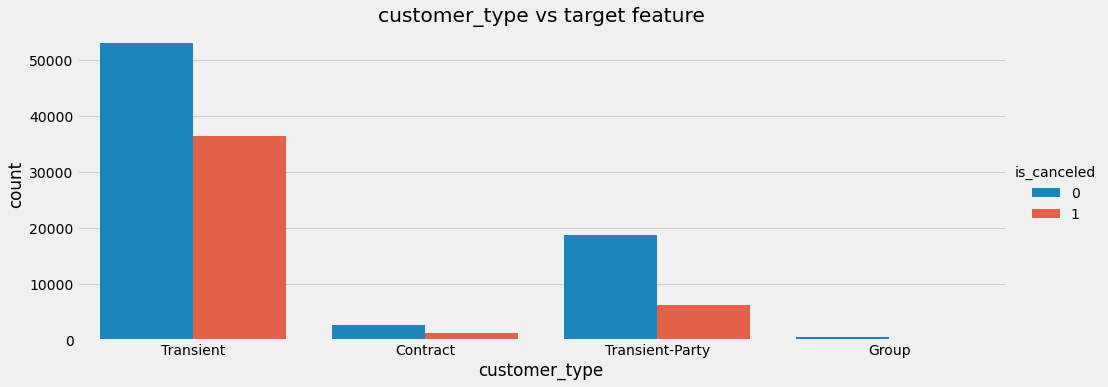

In [20]:
sns.catplot(x="customer_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('customer_type vs target feature')
plt.show()

## Data cleaning

In [21]:
missing = pd.concat([hotels.isnull().sum(), 100 * hotels.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head()

,count,%
country,488,0.408744
children,4,0.003350
hotel,0,0.000000
agent,0,0.000000
reserved_room_type,0,0.000000


Apparently we have only 2 features with missing values - 488 missing countries and 4 missing children number.

We will replace the missing country values with 'UNK'. Another option would have been to replace those with the most common value, in this case PRT(Portugal) but maybe those missing values are especially from tourists that came from outside Portugal, so we don't want to loose any specific info.

Fot the missing children info, we will replace the missing data with the average.

In [22]:
#Replacing missing countries with 'UNK'
condition1 = hotels.country.isnull()
hotels.loc[condition1, 'country'] = 'UNK'
hotels.country.isnull().sum()

0

In [23]:
#Replacing missing children values with the average 

hotels['children'].fillna(value=hotels['children'].mean(), inplace=True)
hotels.children.value_counts()

0.00000     110796
1.00000       4861
2.00000       3652
3.00000         76
0.10389          4
10.00000         1
Name: children, dtype: int64

We can also see we have an outlier with 10 children.

In [24]:
missing = pd.concat([hotels.isnull().sum(), 100 * hotels.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head()

,count,%
hotel,0,0.0
is_canceled,0,0.0
reservation_status,0,0.0
total_of_special_requests,0,0.0
required_car_parking_spaces,0,0.0


We can remember from the initial inspection of the dataset that both **agent** and **company** had NULL values.
We will explore these 2 features

In [25]:
hotels.agent.value_counts().head(10), hotels.company.value_counts().head(10), 

(          9    31961
        NULL    16340
         240    13922
           1     7191
          14     3640
           7     3539
           6     3290
         250     2870
         241     1721
          28     1666
 Name: agent, dtype: int64,
        NULL    112593
          40       927
         223       784
          67       267
          45       250
         153       215
         174       149
         219       141
         281       138
         154       133
 Name: company, dtype: int64)

We are missing 16340 agent values and 112593 company values. Which makes sense, since there might be some visitors that made the booking without an agent, and most of the people staying in the hotel will be paying for the stay themselves and not their company.

We might replace those **NULL** values with **no_agent** or **no_company**, but we will keep these features as they are for the moment.

### Outliers in numerical features

Finnaly, let's explore some of **the outliers in the numerical features** we were able to identify with the help of the describe method:
- stays_in_weekend_nights having value as high as 19
- stays_in_week_nights with values as high as 50
- adults - 55
- babies - 10
- children - 10
- required_car_parking_spaces - 8

In [26]:
#Exploring the very long stay in hotels
hotels.sort_values(by = 'stays_in_weekend_nights', ascending = False).head().T

,14038,14037,9839,61734,33924
hotel,Resort Hotel,Resort Hotel,Resort Hotel,City Hotel,Resort Hotel
is_canceled,0,0,1,0,0
lead_time,126,113,322,140,71
arrival_date_year,2016,2015,2017,2016,2017
arrival_date_month,July,August,January,September,January
arrival_date_week_number,28,31,2,39,2
arrival_date_day_of_month,5,1,10,22,10
stays_in_weekend_nights,19,18,16,16,16
stays_in_week_nights,50,42,40,41,40
adults,1,1,2,0,2


These seem to be fine. Most of the reservations went through.

In [27]:
#Exploring the high occupancy reservations
hotels.sort_values(by = 'adults', ascending = False).head(10).T

,2173,1643,1539,1917,1962,2003,1752,2164,1587,1884
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,1,1,1,1,1,1,1,1,1,1
lead_time,338,336,304,349,352,354,340,361,333,347
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,October,September,September,September,September,September,September,October,September,September
arrival_date_week_number,41,37,36,39,39,39,37,40,36,38
arrival_date_day_of_month,4,7,3,21,24,26,12,3,5,19
stays_in_weekend_nights,2,1,0,1,1,2,2,2,2,2
stays_in_week_nights,0,2,3,3,3,5,5,5,5,5
adults,55,50,40,27,27,26,26,26,26,26


We can see that the high occupancy reservations are always getting canceled. And this has a great impact on the business operations in the hotel.

In [28]:
#Exploring the high number of babies and children in reservations
hotels.sort_values(by = 'babies', ascending = False).head().T

,6559,38596,54003,64291,33332
hotel,City Hotel,City Hotel,City Hotel,City Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,37,11,4,19,31
arrival_date_year,2016,2015,2016,2017,2017
arrival_date_month,January,October,July,January,February
arrival_date_week_number,3,42,31,2,8
arrival_date_day_of_month,12,11,27,8,19
stays_in_weekend_nights,0,2,0,2,1
stays_in_week_nights,2,1,4,2,0
adults,2,1,2,2,2


In [29]:
hotels.sort_values(by = 'children', ascending = False).head().T

,328,53650,25389,37894,42928
hotel,Resort Hotel,City Hotel,Resort Hotel,Resort Hotel,City Hotel
is_canceled,1,0,0,0,0
lead_time,55,99,8,139,0
arrival_date_year,2015,2016,2016,2017,2016
arrival_date_month,July,July,June,June,January
arrival_date_week_number,29,30,26,26,2
arrival_date_day_of_month,12,22,23,29,8
stays_in_weekend_nights,4,1,0,0,0
stays_in_week_nights,10,2,2,3,2
adults,2,2,2,2,0


In [30]:
hotels.sort_values(by = 'required_car_parking_spaces', ascending = False).head().T

,29045,29046,62702,38117,70752
hotel,Resort Hotel,Resort Hotel,City Hotel,Resort Hotel,City Hotel
is_canceled,0,0,0,0,0
lead_time,26,138,13,205,30
arrival_date_year,2017,2017,2016,2017,2017
arrival_date_month,March,March,December,June,April
arrival_date_week_number,11,12,50,26,17
arrival_date_day_of_month,14,19,5,26,29
stays_in_weekend_nights,0,2,1,3,2
stays_in_week_nights,5,2,0,10,1
adults,2,2,1,2,2


Concluding we see that these outliers values have reasonable chances of maintaining their reservations, and they don't seem to be input errors. The only red flag is raised by the fact that all 10 biggest reservations, for a total number of people between 26 and 55, all have been canceled. But we will explore all this in the future notebooks. 

### Saving Data

In [31]:
# Saving cleaned data into interim folder
hotels.to_csv('../data/interim/hotels_cleaned.csv')